Definition from ChatGPT: 

![alternative text](../../data/linear_regression_chatgpt.png)


In [1]:
from torch import nn
import torch
import numpy as np
from matplotlib.pylab import plt
from torch.utils.data import Dataset, DataLoader

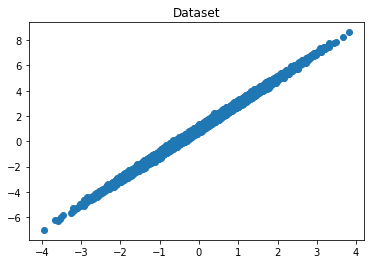

In [2]:
X = torch.randn(15000, 1)
gW = 2 
gb = 1
Y = gW * X + gb + (torch.randn(15000, 1)/10)

plt.scatter(X,Y)
plt.title("Dataset")
plt.show()

In [3]:
class CustomDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X.clone().detach()
        self.Y = Y.clone().detach()
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]
    


In [4]:
# Splitting dataset 
dataset = CustomDataset(X,Y)

train_size  = int(len(X) * 0.9 )
valid_test_size  = int(0.1*len(X))

train_dataset, valid_test_dataset = torch.utils.data.random_split(dataset, [train_size, valid_test_size])
valid_dataset, test_dataset = torch.utils.data.random_split(valid_test_dataset, [valid_test_size//2, valid_test_size//2])


batch_size = 32
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)


In [5]:
# let's make this a function 

def dataset(X,Y):
    dataset = CustomDataset(X,Y)
    train_size  = int(len(X) * 0.9 )
    valid_test_size  = int(0.1*len(X))

    train_dataset, valid_test_dataset = torch.utils.data.random_split(dataset, [train_size, valid_test_size])
    valid_dataset, test_dataset = torch.utils.data.random_split(valid_test_dataset, [valid_test_size//2, valid_test_size//2])


    batch_size = 32
    train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
    return train_data_loader, valid_data_loader, test_dataset

In [6]:
class LinearRegression(nn.Module):
    
    def __init__(self):
        super(LinearRegression, self).__init__()
        
        self.linear = nn.Linear(1,1)
    
    def forward(self, x ): 
        return self.linear(x) 
    
    
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

train_losses = []
val_losses   = []

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, labels in train_data_loader:
        optimizer.zero_grad()
        output = model(inputs) # forward prop
        loss = criterion(output,labels)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        
    train_losses.append(train_loss/len(train_data_loader))
        
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_input, val_labels in valid_data_loader:
            output = model(val_input) # forward prop
            val_loss += criterion(output,val_labels).item()
            
        val_losses.append(val_loss/len(valid_data_loader))
    
    if (epoch + 1)%10==0:
        print(f'epoch {epoch+1}, train loss:{train_losses[-1]:.4f} , valid loss:{val_losses[-1]:.4f}')
    


epoch 10, train loss:0.0101 , valid loss:0.0099
epoch 20, train loss:0.0101 , valid loss:0.0098


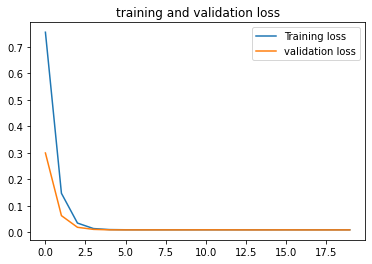

In [7]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.title("training and validation loss")
plt.legend(["Training loss","validation loss"])
plt.show()

Let's encapsulate our training pipeline, we're gonna it a few times 

In [8]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
num_epochs = 20

def training(train_data_loader,valid_data_loader, criterion, optimizer,num_epochs ):
    train_losses = []
    val_losses   = []


    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for inputs, labels in train_data_loader:
            optimizer.zero_grad()
            output = model(inputs) # forward prop
            loss = criterion(output,labels)
            train_loss += loss.item()
            loss.backward()
            optimizer.step()

        train_losses.append(train_loss/len(train_data_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for val_input, val_labels in valid_data_loader:
                output = model(val_input) # forward prop
                val_loss += criterion(output,val_labels).item()

            val_losses.append(val_loss/len(valid_data_loader))

        if (epoch + 1)%10==0:
            print(f'epoch {epoch+1}, train loss:{train_losses[-1]:.4f} , valid loss:{val_losses[-1]:.4f}')
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.title("training and validation loss")
    plt.legend(["Training loss","validation loss"])
    plt.show()


In [9]:
Xs = []
ys = []
preds = []
for x,y in test_dataset:
    with torch.no_grad():
        pred = model(x).detach().numpy()
        Xs.append(x.detach().numpy())
        ys.append(y.detach().numpy())
        preds.append(pred)


let's make this a function as well:

In [10]:
def testing(test_dataset):
    Xs = []
    ys = []
    preds = []
    for x,y in test_dataset:
        with torch.no_grad():
            pred = model(x).detach().numpy()
            Xs.append(x.detach().numpy())
            ys.append(y.detach().numpy())
            preds.append(pred)

    plt.scatter(Xs,ys)
    plt.scatter(Xs,preds)
    plt.title("Ground Truth vs Fitted Line")
    plt.legend(["ground truth","fitted line"])
    plt.show()

In [11]:
params = model.parameters()
w = next(params).detach().squeeze().numpy()
b = next(params).detach().squeeze().numpy()
print(f'true w: {gW:.4f} and true b: {gb:.4f}')
print(f'estimated w: {w:.4f} and estimated b: {b:.4f}')

true w: 2.0000 and true b: 1.0000
estimated w: -0.7804 and estimated b: 0.3306


# Now let's try making the non-linear 
Linear regression is not gonna make it here. But, let's see what happens. 

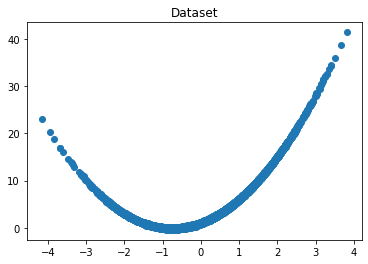

In [12]:
X = torch.randn(15000, 1)
gW1 = 2 
gW2 = 3 

gb = 1
Y = gW1 * X**2 + gW2 * X + gb + (torch.randn(15000, 1)/10)

plt.scatter(X,Y)
plt.title("Dataset")
plt.show()

epoch 10, train loss:7.9851 , valid loss:10.2291
epoch 20, train loss:7.9847 , valid loss:9.9333


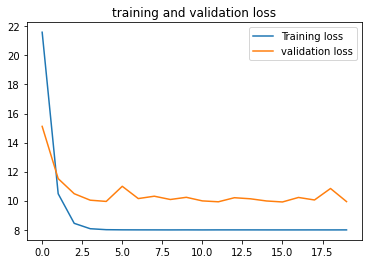

In [13]:
# Splitting dataset 
train_data_loader, valid_data_loader, test_dataset = dataset(X,Y)
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
num_epochs = 20

training(train_data_loader, valid_data_loader , criterion, optimizer,num_epochs )

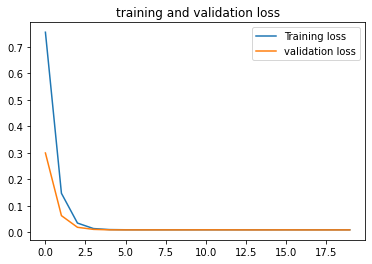

In [14]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.title("training and validation loss")
plt.legend(["Training loss","validation loss"])
plt.show()

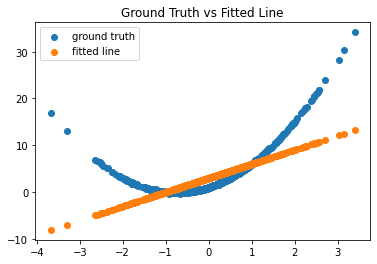

In [15]:
testing(test_dataset)

Let's introduce more layers... Linear of linear is still Linear

In [16]:
class MulitLinearRegression(nn.Module):
    
    def __init__(self):
        super(MulitLinearRegression, self).__init__()
        
        self.linear1 = nn.Linear(1,20)
        self.linear2 = nn.Linear(20,1)
    
    def forward(self, x ): 
        x1 = self.linear1(x) 
        y = self.linear2(x1) 
        return y

epoch 10, train loss:8.0013 , valid loss:9.9333
epoch 20, train loss:7.9982 , valid loss:10.0393


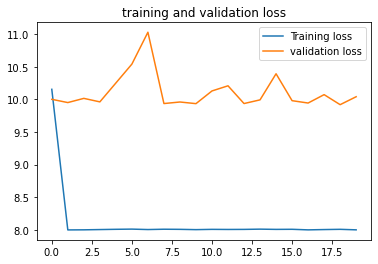

In [17]:
# Splitting dataset 
model = MulitLinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
num_epochs = 20
training(train_data_loader, valid_data_loader, criterion, optimizer,num_epochs )

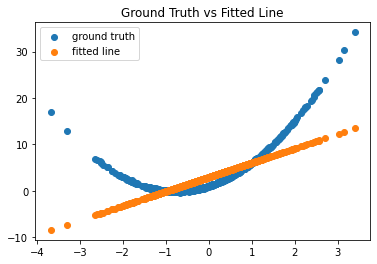

In [18]:
testing(test_dataset)

 As expected, increasing the parameters of the model without introducing non-linearity didn't solve the non-linearity in our dataset.

So, let's introduce non-linearity in our model. 

In [19]:
class NonLinearRegression(nn.Module):
    
    def __init__(self):
        super(NonLinearRegression, self).__init__()
        
        self.linear1 = nn.Linear(1,20)
        self.linear2 = nn.Linear(20,1)
        self.relu = nn.ReLU()
    
    def forward(self, x ): 
        x1 = self.relu(self.linear1(x))
        y = self.linear2(x1) 
        return y
    

epoch 10, train loss:0.3396 , valid loss:0.6169
epoch 20, train loss:0.1749 , valid loss:0.3727


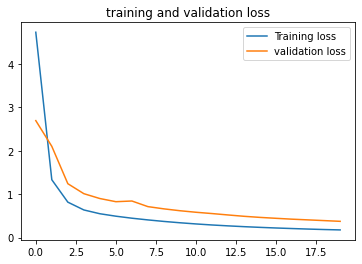

In [20]:
# Splitting dataset 
model = NonLinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
num_epochs = 20
training(train_data_loader, valid_data_loader, criterion, optimizer,num_epochs )

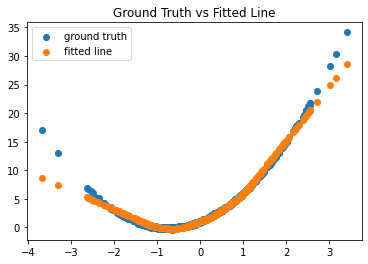

In [21]:
testing(test_dataset)

Let's make the dataset a little more difficult 

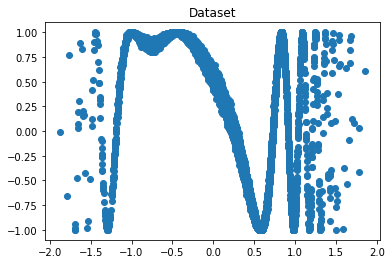

In [22]:
X = torch.randn(15000, 1)/2
gW1 = 4 
gW2 = 3
gW3 = 2

gb = 1
Y = np.cos(gW1 * X**4+ gW2 * X**3 + gW3 * X + gb + (torch.randn(15000, 1)/20))

plt.scatter(X,Y)
plt.title("Dataset")
plt.show()

epoch 10, train loss:0.1636 , valid loss:0.1436
epoch 20, train loss:0.1406 , valid loss:0.1212
epoch 30, train loss:0.1252 , valid loss:0.1118
epoch 40, train loss:0.1132 , valid loss:0.0986
epoch 50, train loss:0.1004 , valid loss:0.0899
epoch 60, train loss:0.0904 , valid loss:0.0829
epoch 70, train loss:0.0850 , valid loss:0.0748
epoch 80, train loss:0.0819 , valid loss:0.0724
epoch 90, train loss:0.0799 , valid loss:0.0705
epoch 100, train loss:0.0785 , valid loss:0.0714
epoch 110, train loss:0.0775 , valid loss:0.0684
epoch 120, train loss:0.0767 , valid loss:0.0690
epoch 130, train loss:0.0760 , valid loss:0.0695
epoch 140, train loss:0.0753 , valid loss:0.0658
epoch 150, train loss:0.0745 , valid loss:0.0653


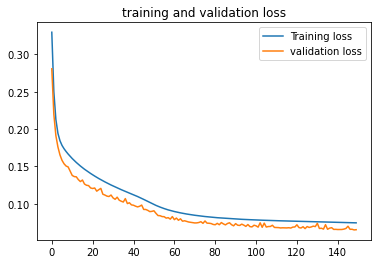

In [23]:
# Splitting dataset 
train_data_loader, valid_data_loader, test_dataset = dataset(X,Y)
model = NonLinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
num_epochs = 150
training(train_data_loader, valid_data_loader, criterion, optimizer,num_epochs )

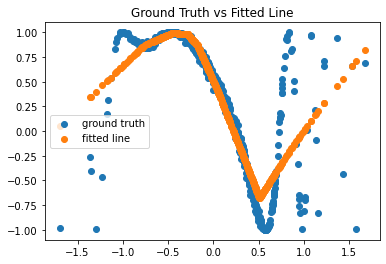

In [24]:
testing(test_dataset)

As you saw the training loss had a hard time going below 6, so we might want to make our model a bit deeper and bigger

In [25]:
class DeepNonLinearRegression(nn.Module):
    
    def __init__(self):
        super(DeepNonLinearRegression, self).__init__()
        
        self.linear1 = nn.Linear(1,64)
        self.linear2 = nn.Linear(64,128)
        self.linear3 = nn.Linear(128,1)
        self.relu = nn.ReLU()
    
    def forward(self, x ): 
        x1 = self.relu(self.linear1(x))
        x2 = self.relu(self.linear2(x1))
        y = self.linear3(x2) 
        return y
    

epoch 10, train loss:0.1477 , valid loss:0.1700
epoch 20, train loss:0.1282 , valid loss:0.1497
epoch 30, train loss:0.1128 , valid loss:0.1344
epoch 40, train loss:0.1004 , valid loss:0.1218
epoch 50, train loss:0.0913 , valid loss:0.1191
epoch 60, train loss:0.0851 , valid loss:0.1062
epoch 70, train loss:0.0806 , valid loss:0.1004
epoch 80, train loss:0.0774 , valid loss:0.1001
epoch 90, train loss:0.0748 , valid loss:0.0979
epoch 100, train loss:0.0728 , valid loss:0.0934
epoch 110, train loss:0.0712 , valid loss:0.0919
epoch 120, train loss:0.0696 , valid loss:0.0961
epoch 130, train loss:0.0679 , valid loss:0.0888
epoch 140, train loss:0.0665 , valid loss:0.0936
epoch 150, train loss:0.0654 , valid loss:0.0855
epoch 160, train loss:0.0645 , valid loss:0.0863
epoch 170, train loss:0.0638 , valid loss:0.0856
epoch 180, train loss:0.0631 , valid loss:0.0833
epoch 190, train loss:0.0624 , valid loss:0.0828
epoch 200, train loss:0.0618 , valid loss:0.0818
epoch 210, train loss:0.0612 

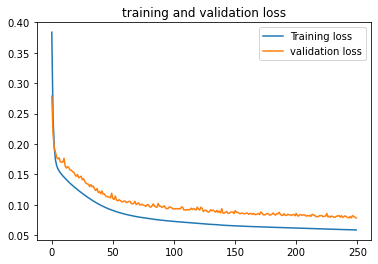

In [29]:
# Splitting dataset 
train_data_loader, valid_data_loader, test_dataset = dataset(X,Y)
model = DeepNonLinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0005)
num_epochs = 250
training(train_data_loader, valid_data_loader, criterion, optimizer,num_epochs )

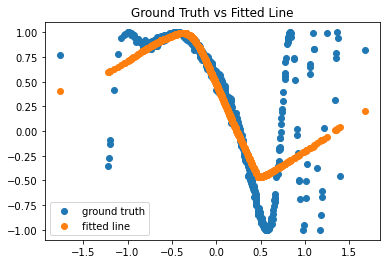

In [28]:
testing(test_dataset)